### sklearn的K均值分类

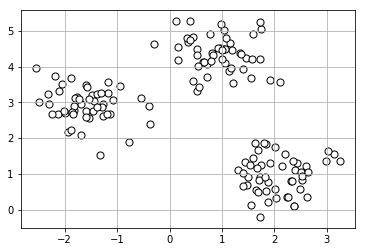

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=.5, shuffle=True, random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c="white", marker="o", edgecolors="black", s=50)
plt.grid()
plt.show()

In [2]:
%matplotlib inline

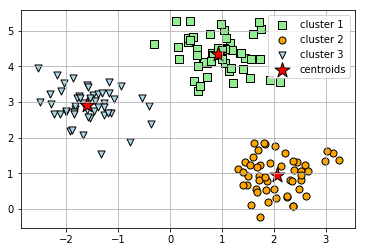

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0], X[y_km==0, 1], s=50, c="lightgreen", marker="s", edgecolors="black", label="cluster 1")
plt.scatter(X[y_km==1,0], X[y_km==1, 1], s=50, c="orange", marker="o", edgecolors="black", label="cluster 2")
plt.scatter(X[y_km==2,0], X[y_km==2, 1], s=50, c="lightblue", marker="v", edgecolors="black", label="cluster 3")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=250, marker="*", c="red", edgecolors="black", label="centroids")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [6]:
km.inertia_

72.47601670996698

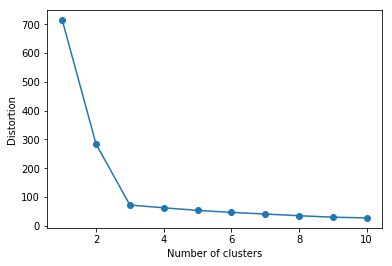

In [7]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

### 通过轮廓系数量化聚类质量

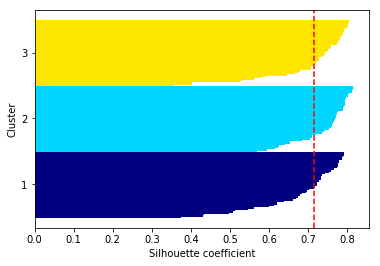

In [12]:
km = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
clusterLabels = np.unique(y_km)
nClusters = clusterLabels.shape[0]
silhouetteVals = silhouette_samples(X, y, metric="euclidean")

yAxLower, yAxUpper = 0, 0
yticks = []
for i, c in enumerate(clusterLabels):
    cSilhouetteVals = silhouetteVals[y_km==c]
    cSilhouetteVals.sort()
    
    yAxUpper += len(cSilhouetteVals)
    color = cm.jet(float(i) / nClusters)
    plt.barh(range(yAxLower, yAxUpper), cSilhouetteVals, height=1.0, edgecolor="none", color=color)
    yticks.append((yAxLower + yAxUpper) / 2.)
    yAxLower += len(cSilhouetteVals)
silhouetteAvg = np.mean(silhouetteVals)
plt.axvline(silhouetteAvg, color="red", linestyle="--")
plt.yticks(yticks, clusterLabels+1)#!!!
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.show()

In [10]:
yticks, clusterLabels+1

([25.0, 75.0, 125.0], array([1, 2, 3]))

#### 只有两个重心的k均值算法

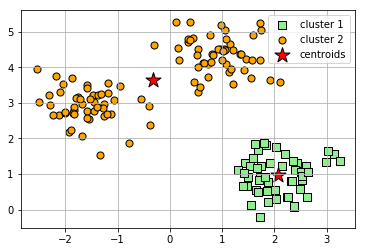

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init="random", n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0], X[y_km==0, 1], s=50, c="lightgreen", marker="s", edgecolors="black", label="cluster 1")
plt.scatter(X[y_km==1,0], X[y_km==1, 1], s=50, c="orange", marker="o", edgecolors="black", label="cluster 2")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=250, marker="*", c="red", edgecolors="black", label="centroids")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

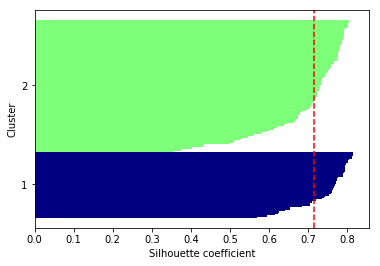

In [14]:
km = KMeans(n_clusters=2, init="random", n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
clusterLabels = np.unique(y_km)
nClusters = clusterLabels.shape[0]
silhouetteVals = silhouette_samples(X, y, metric="euclidean")

yAxLower, yAxUpper = 0, 0
yticks = []
for i, c in enumerate(clusterLabels):
    cSilhouetteVals = silhouetteVals[y_km==c]
    cSilhouetteVals.sort()
    
    yAxUpper += len(cSilhouetteVals)
    color = cm.jet(float(i) / nClusters)
    plt.barh(range(yAxLower, yAxUpper), cSilhouetteVals, height=1.0, edgecolor="none", color=color)
    yticks.append((yAxLower + yAxUpper) / 2.)
    yAxLower += len(cSilhouetteVals)
silhouetteAvg = np.mean(silhouetteVals)
plt.axvline(silhouetteAvg, color="red", linestyle="--")
plt.yticks(yticks, clusterLabels+1)#!!!
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.show()

### 以自下而上的方式聚类

In [18]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = list("XYZ")
labels = ["ID"+ str(i) for i in range(0,5)]
X = np.random.random_sample([5,3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID0,6.964692,2.861393,2.268515
ID1,5.513148,7.194690,4.231065
ID2,9.807642,6.848297,4.809319
ID3,3.921175,3.431780,7.290497
ID4,4.385722,0.596779,3.980443


### 在距离矩阵上进行层次聚类

In [20]:
from scipy.spatial.distance import pdist, squareform
rowDist = pd.DataFrame(squareform(pdist(df, metric="euclidean")), columns=labels, index=labels)
rowDist

,ID0,ID1,ID2,ID3,ID4
ID0,0.000000,4.973534,5.516653,5.899885,3.835396
ID1,4.973534,0.000000,4.347073,5.104311,6.698233
ID2,5.516653,4.347073,0.000000,7.244262,8.316594
ID3,5.899885,5.104311,7.244262,0.000000,4.382864
ID4,3.835396,6.698233,8.316594,4.382864,0.000000


In [24]:
from scipy.cluster.hierarchy import linkage
rowClusters = linkage(df.values, method="complete", metric="euclidean")
rowClusters

pd.DataFrame(rowClusters, columns=["row label 1", "row label 2", "distance", "no. of items in clust."], 
             index=["cluster %d" % (i+1) for i in range(rowClusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


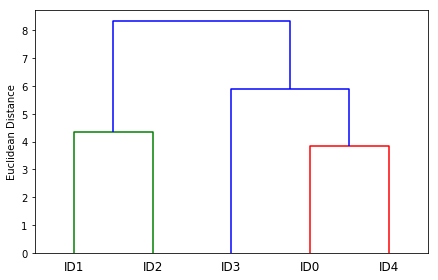

In [25]:
from scipy.cluster.hierarchy import dendrogram
rowDendr = dendrogram(rowClusters, labels=labels)
plt.tight_layout()
plt.ylabel("Euclidean Distance")
plt.show()

### sklearn凝聚聚类方法

In [27]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
labels = ac.fit_predict(X)
print("Cluster labels: %s" % labels)

Cluster labels: [1 0 0 2 1]


## 使用DBSCAN聚类高密度区域

#### K均值和凝聚聚类处理半月形集群

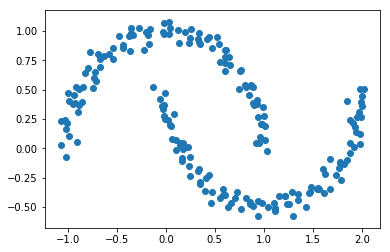

In [28]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

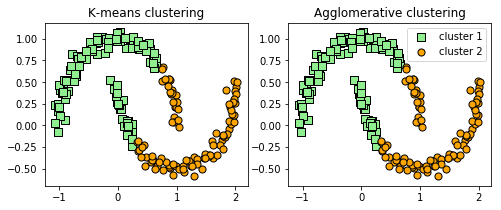

In [29]:
f, (ax1, ax2)  = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km==0,0], X[y_km==0, 1], s=50, c="lightgreen", marker="s", edgecolors="black", label="cluster 1")
ax1.scatter(X[y_km==1,0], X[y_km==1, 1], s=50, c="orange", marker="o", edgecolors="black", label="cluster 2")
ax1.set_title("K-means clustering")
ac = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="complete")

y_ac = ac.fit_predict(X)
ax2.scatter(X[y_km==0,0], X[y_km==0, 1], s=50, c="lightgreen", marker="s", edgecolors="black", label="cluster 1")
ax2.scatter(X[y_km==1,0], X[y_km==1, 1], s=50, c="orange", marker="o", edgecolors="black", label="cluster 2")
ax2.set_title("Agglomerative clustering")
plt.legend()
plt.show()


#### DBSCAN算法

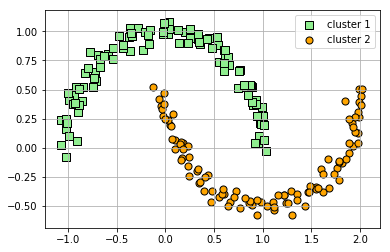

In [31]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=.2, min_samples=5, metric="euclidean")
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0], X[y_db==0, 1], s=50, c="lightgreen", marker="s", edgecolors="black", label="cluster 1")
plt.scatter(X[y_db==1,0], X[y_db==1, 1], s=50, c="orange", marker="o", edgecolors="black", label="cluster 2")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()